# Importing all the necessary libraries and modules

In [159]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

# Importing the dataset
## Using `pd.read_csv()` to convert the csv file into a dataframe

In [160]:
file_path = "/content/drive/MyDrive/hotel_booking.csv"
df = pd.read_csv(file_path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


We separate the `is_canceled` column from the dataframe and make a separate dataframe called `y` which will be our y values

In [161]:
X = df.drop("is_canceled", axis = 1)
y = df["is_canceled"]

Converting the y values into float32

In [162]:
y = y.astype('float32')

In [163]:
y[1000:]

1000      0.0
1001      1.0
1002      0.0
1003      1.0
1004      0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: is_canceled, Length: 118390, dtype: float32

# Data visualization

Using Seaborn we create a heatmap of the datafram which highlight the most co relation to the booking getting canceled.
`Note:` Only numerical values are shown in the heatmap. Text values are ignored

Index(['is_canceled', 'lead_time', 'previous_cancellations', 'adults',
       'days_in_waiting_list', 'adr', 'stays_in_week_nights',
       'arrival_date_year', 'arrival_date_week_number', 'children',
       'stays_in_weekend_nights', 'arrival_date_day_of_month', 'company',
       'babies', 'previous_bookings_not_canceled', 'agent',
       'is_repeated_guest', 'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


<Axes: >

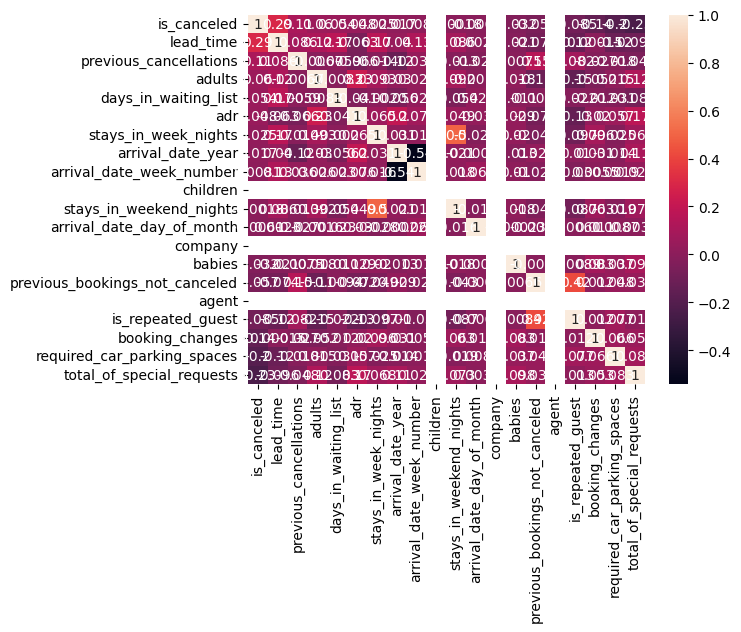

In [164]:
k =25
cols = df.select_dtypes(include=['number']).corr().nlargest(k, 'is_canceled')['is_canceled'].index
cm = np.corrcoef(df[cols].values.T)
print(cols)
sns.heatmap(cm, cbar=True, annot=True, xticklabels=cols.values, yticklabels=cols.values)

Making a list of the features that were obtained from the heatmap

In [165]:
important_features_17 = [ 'lead_time', 'previous_cancellations', 'adults',
       'days_in_waiting_list', 'adr', 'stays_in_week_nights',
       'arrival_date_year', 'arrival_date_week_number', 'children',
       'stays_in_weekend_nights', 'arrival_date_day_of_month',
       'babies', 'previous_bookings_not_canceled',
       'is_repeated_guest', 'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests']

In [166]:
len(important_features_17)

17

In [167]:
df['babies'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: babies, Length: 119390, dtype: bool

Visualizing the type and number of data in each column that we are dealing

In [168]:
for a in important_features_13:
  print(f"{a}  {X[a].unique()}\
  \n--------------------------------------------------------------\n\n")

lead_time  [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 216
 169 209 238 215 141 189 187 223 284 214

Create a dataframe with only the `important features`

In [169]:
X = df[important_features_17]

In [170]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   previous_cancellations          119390 non-null  int64  
 2   adults                          119390 non-null  int64  
 3   days_in_waiting_list            119390 non-null  int64  
 4   adr                             119390 non-null  float64
 5   stays_in_week_nights            119390 non-null  int64  
 6   arrival_date_year               119390 non-null  int64  
 7   arrival_date_week_number        119390 non-null  int64  
 8   children                        119386 non-null  float64
 9   stays_in_weekend_nights         119390 non-null  int64  
 10  arrival_date_day_of_month       119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  previous_booking

In [171]:
X.isnull().sum()

lead_time                         0
previous_cancellations            0
adults                            0
days_in_waiting_list              0
adr                               0
stays_in_week_nights              0
arrival_date_year                 0
arrival_date_week_number          0
children                          4
stays_in_weekend_nights           0
arrival_date_day_of_month         0
babies                            0
previous_bookings_not_canceled    0
is_repeated_guest                 0
booking_changes                   0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

Dealing with `null` values

In [172]:
X['children'].fillna(1,inplace=True)

<ipython-input-172-9a2858abaeb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['children'].fillna(1,inplace=True)


Checking again if the entire dataframe is `null` free

In [173]:
X.isnull().sum()

lead_time                         0
previous_cancellations            0
adults                            0
days_in_waiting_list              0
adr                               0
stays_in_week_nights              0
arrival_date_year                 0
arrival_date_week_number          0
children                          0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
babies                            0
previous_bookings_not_canceled    0
is_repeated_guest                 0
booking_changes                   0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

# Normalizing the Data
Using MinMaxScalar we transform each column into a normalised state which can be processed by our Neural network while training

In [174]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
 (MinMaxScaler(),['lead_time', 'previous_cancellations', 'adults',
       'days_in_waiting_list', 'adr', 'stays_in_week_nights',
       'arrival_date_year', 'arrival_date_week_number', 'children',
       'stays_in_weekend_nights', 'arrival_date_day_of_month',
       'babies', 'previous_bookings_not_canceled',
       'is_repeated_guest', 'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests']))

Splitting the dataframe into training and testing data so we can can have data to validate our neural network

In [175]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.1 , random_state = 42)

In [176]:
X_train.head()

,lead_time,previous_cancellations,adults,days_in_waiting_list,adr,stays_in_week_nights,arrival_date_year,arrival_date_week_number,children,stays_in_weekend_nights,arrival_date_day_of_month,babies,previous_bookings_not_canceled,is_repeated_guest,booking_changes,required_car_parking_spaces,total_of_special_requests
114297,20,0,1,0,94.00,0,2017,25,0.0,1,19,0,0,0,0,0,0
117795,125,0,2,0,111.60,2,2017,32,0.0,2,6,0,0,0,0,0,0
115047,22,0,2,0,112.67,3,2017,26,0.0,0,28,0,0,0,0,0,1
26115,160,0,2,0,102.80,3,2016,30,0.0,1,18,0,0,0,0,0,0
70863,263,0,1,0,95.00,2,2017,25,0.0,2,23,0,0,0,1,0,1


Fitting the transformer

In [177]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['lead_time', 'previous_cancellations',
                                  'adults', 'days_in_waiting_list', 'adr',
                                  'stays_in_week_nights', 'arrival_date_year',
                                  'arrival_date_week_number', 'children',
                                  'stays_in_weekend_nights',
                                  'arrival_date_day_of_month', 'babies',
                                  'previous_bookings_not_canceled',
                                  'is_repeated_guest', 'booking_changes',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests'])])

Applying the transform,er to our training and validation data

In [178]:
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [179]:
X_train[5]

array([0.33649932, 0.        , 0.04      , 0.        , 0.01246305,
       0.08      , 1.        , 0.32692308, 0.        , 0.05263158,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.125     , 0.2       ])

In [180]:
y_train

114297    0.0
117795    0.0
115047    0.0
26115     0.0
70863     1.0
         ... 
76820     0.0
110268    0.0
103694    0.0
860       1.0
15795     0.0
Name: is_canceled, Length: 107451, dtype: float32

#Model Creation


In [181]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(25 , activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'relu'),
    tf.keras.layers.Dense(6 , activation = 'relu'),
    tf.keras.layers.Dense(3 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

# Model Compilation

In [182]:
model.compile(loss = "binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

#Model Fitting

In [183]:
history = model.fit(X_train,y_train,validation_data = (X_test , y_test), epochs = 10,batch_size = 32)

Epoch 1/10
3358/3358 [==============================] - 7s 2ms/step - loss: 0.5544 - accuracy: 0.7167 - val_loss: 0.5163 - val_accuracy: 0.7612
Epoch 2/10
3358/3358 [==============================] - 6s 2ms/step - loss: 0.5040 - accuracy: 0.7606 - val_loss: 0.4936 - val_accuracy: 0.7668
Epoch 3/10
3358/3358 [==============================] - 6s 2ms/step - loss: 0.4898 - accuracy: 0.7657 - val_loss: 0.4847 - val_accuracy: 0.7692
Epoch 4/10
3358/3358 [==============================] - 6s 2ms/step - loss: 0.4834 - accuracy: 0.7680 - val_loss: 0.4812 - val_accuracy: 0.7702
Epoch 5/10
3358/3358 [==============================] - 6s 2ms/step - loss: 0.4795 - accuracy: 0.7693 - val_loss: 0.4815 - val_accuracy: 0.7683
Epoch 6/10
3358/3358 [==============================] - 6s 2ms/step - loss: 0.4776 - accuracy: 0.7699 - val_loss: 0.4758 - val_accuracy: 0.7719
Epoch 7/10
3358/3358 [==============================] - 6s 2ms/step - loss: 0.4754 - accuracy: 0.7707 - val_loss: 0.4901 - val_accuracy:

# Checking the model's performance

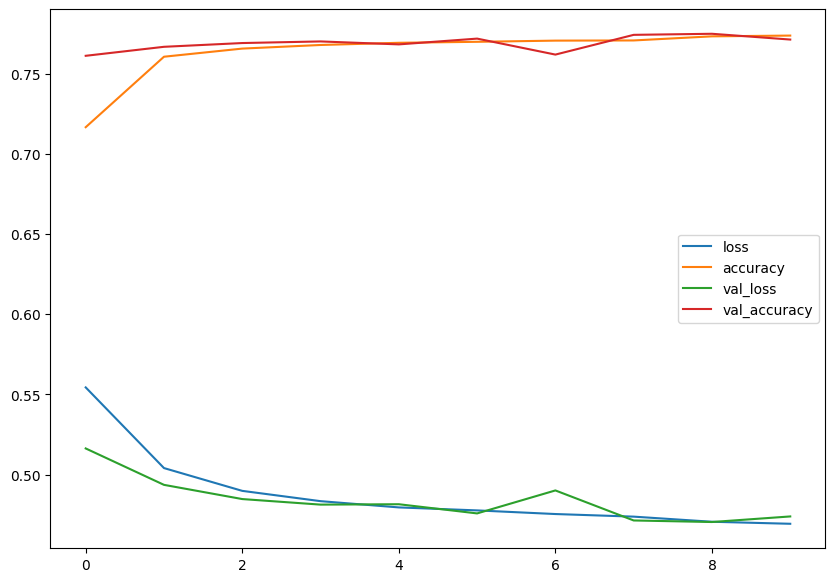

In [184]:

import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));